
# Diameter of pulmonary artery using Region Growing(Segmentation):

Region growing is a simple region-based image segmentation method. It is also classified as a pixel-based image segmentation method since it involves the selection of initial seed points.

We are using this method for seperating the pulmonary artery from other internal parts in DICOM file.We are taking a chest CT-scan Dataset, which is in DICOM format.Here we use pydicom ,matplotlib ,simpleitk ,sklearn ,math ,ipywidgets as libraries.

## Step 1 : Importing Libraries

We need to import all these libraries.





In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, FloatSlider
import SimpleITK as sitk 
import math
import pydicom




## Step 2 : Path Creation

We need to create the path for the dicom files.





In [2]:
path = "B:\internship\PAT001"




## Step 3 : Creating image object 

Here by using the simpleitk we are going to create an image reader object.And get a series of file addresses.We will set all these addresses in image reader object and read all these images.

### Extracting Meta-Data

Here using the pydicom we will extract the meta-data info of the DICOM files.In that we will get all the information of the DCM file,here we use this meta-data info in the coming lines of code.





In [3]:
reader = sitk.ImageSeriesReader()
filenamesDICOM = reader.GetGDCMSeriesFileNames(path)
reader.SetFileNames(filenamesDICOM)
imgOriginal = reader.Execute()
ds = pydicom.filereader.dcmread("B:\internship\PAT001\D0118.dcm")
print(ds)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELICAL']
(0008, 0012) Instance Creation Date              DA: '0'
(0008, 0013) Instance Creation Time              TM: '174456.703'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.36575964112688468819954397911791824991
(0008, 0020) Study Date                          DA: '0'
(0008, 0022) Acquisition Date                    DA: '0'
(0008, 0023) Content Date                        DA: '0'
(0008, 0030) Study Time                          TM: '0'
(0008, 0032) Acquisition Time                    TM: '0'
(0008, 0033) Content Time                        TM: '0'
(0008, 0050) Accession Number                    SH: '0'
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) Manufacturer                        LO: '0'
(0008, 0080) 




## Step 4 : Function Creation

For viewing the dicom images we require a function ,here we defined a user defined fuction for viewing the DICOM image by simpleitk and matplotlib.





In [4]:
def sitk_show(img, title=None, margin=0.05, dpi=50 ):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1+ margin) * nda.shape[0] / dpi, (1+ margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(dpi=dpi,figsize=figsize)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin,])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)




## Step 5 : Displaying and Rescaling

Normally in DICOM files we will be having different views like axial ,coronol ,sagittal view ,here we use axial view and also rescale the intensity of the image by using simpleitk.And we display the image using the user defined function which we created.





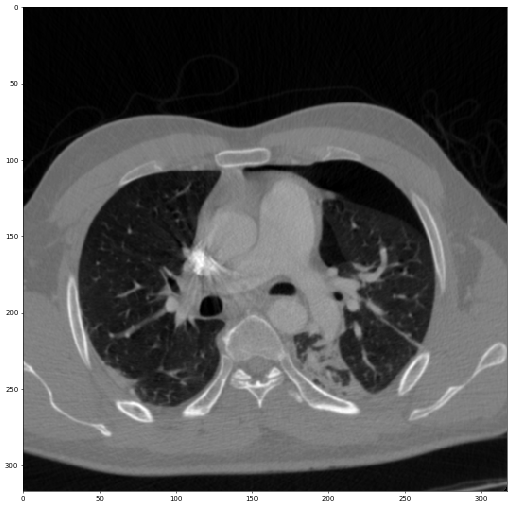

In [5]:
img1 = imgOriginal[:,:,118]
img1_255 = sitk.Cast(sitk.RescaleIntensity(img1), sitk.sitkUInt8)
sitk_show(img1)




## Step 6 : Thresholding

There are different types of threshodlings and here we will be using basic and binary thresholding.

### Basic thresholding

In basic thresholding all the tissues of less intensities get marked,and it can be seen by the user defined function.





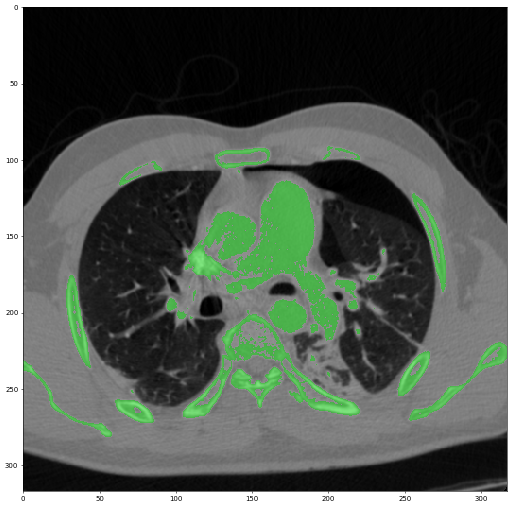

In [6]:
seg = img1>200
sitk_show(sitk.LabelOverlay(img1_255, seg), "Basic Thresholding")




### Binary thersholding

This image analysis technique is a type of image segmentation that isolates objects by converting grayscale images into binary images.But here we use other colour for determining it. 





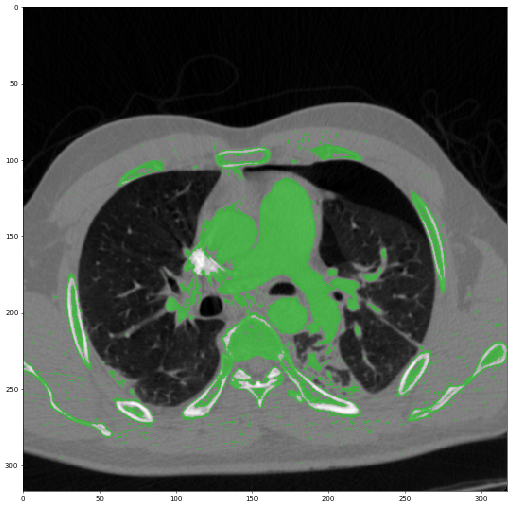

In [7]:
seg = sitk.BinaryThreshold(img1, lowerThreshold=100, upperThreshold=400, insideValue=1, outsideValue=0)
sitk_show(sitk.LabelOverlay(img1_255, seg), "Binary Thresholding")




## Step 7 : Marking a point

For this segmentation we require a seed from which we will start the region growing through all directions based on instensity level.
So for that purpose we are plotting a seed on the pulmonary artery for segmenting it from other parts.





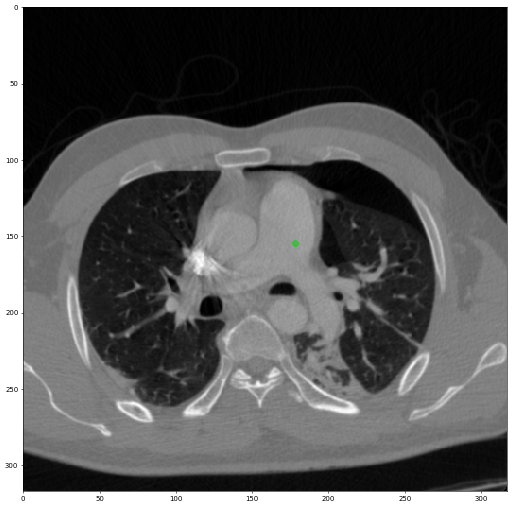

In [8]:
seed = (288,250)
seg = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(img1)
seg[seed] = 1
seg = sitk.BinaryDilate(seg, 3)
sitk_show(sitk.LabelOverlay(img1_255, seg), "Initial Seed")




## Step 8 : Segmentation

We use ConfidenceConnected segmentation for implememting Region-Growing segmentation.We take the initial seed and iterate that seed based on the intensity level of the neighbourhood pixels by a fixed multiplier.

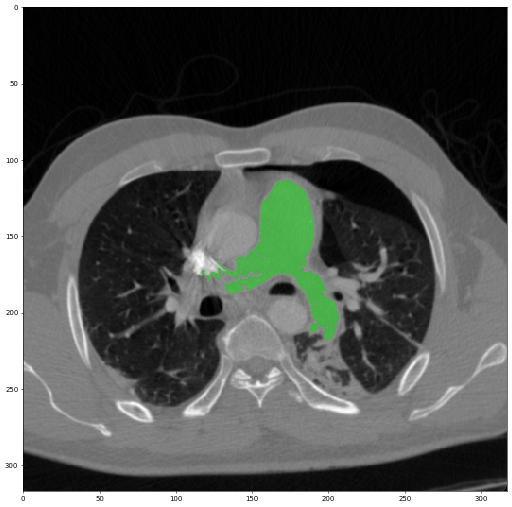

In [9]:


seg = sitk.ConfidenceConnected(img1, seedList=[seed],
                                   numberOfIterations=1,
                                   multiplier=4.67,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)
sitk_show(sitk.LabelOverlay(img1_255, seg), "ConfidenceConnected")






## Step 9 : Taking co-ordinates

From the above segmented region we need to take two co-ordinates using seed method and these points should be on the right and left edges of pulmonary artery in DICOM image.   

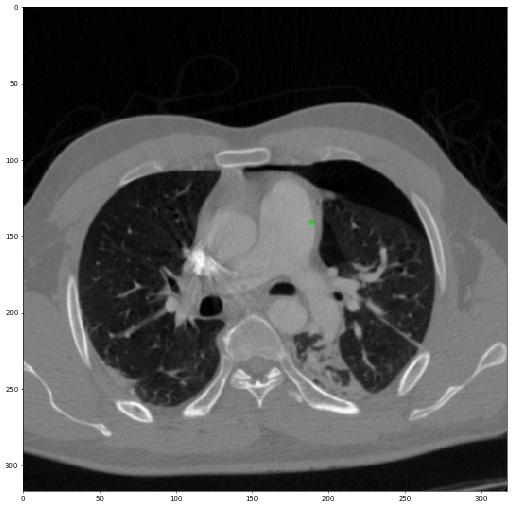

In [14]:
seed = (305,227)
seg = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(img1)
seg[seed] = 1
seg = sitk.BinaryDilate(seg, 3)
sitk_show(sitk.LabelOverlay(img1_255, seg), "Initial Seed")

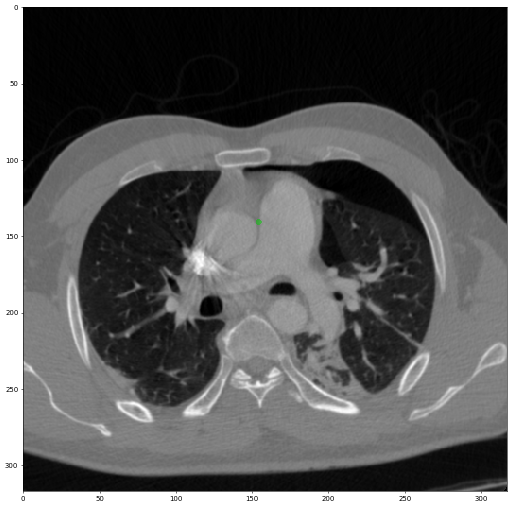

In [15]:
seed = (249,227)
seg = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(img1)
seg[seed] = 1
seg = sitk.BinaryDilate(seg, 3)
sitk_show(sitk.LabelOverlay(img1_255, seg), "Initial Seed")

## Step 10 :

After taking coordinates we need to multiply the indivisual axis values of coordinates with the pixel spacing ,which we got from meta-data.

Lastly we need to apply euclidean distance between these coordinates and the obtained distance is nothing but the diamter of the pulmonary artery.


In [16]:
Point_one = (248.85*0.619141,227.26*0.619141)
Point_two =  (305.84*0.619141,227.26*0.619141)
print('co-ordinates of real file',Point_one,Point_two,'\n')
Distance = math.sqrt((Point_one[0]-Point_two[0])**2 + (Point_one[1]-Point_two[1])**2)
print('diameter of the artery is', Distance)

co-ordinates of real file (154.07323785, 140.70598366000002) (189.35808344, 140.70598366000002) 

diameter of the artery is 35.28484559


# ------------------------------------------ The End -----------------------------------------